In [2]:
import sqlite3
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [35]:
vSqlConnection = sqlite3.connect('resources/coink.db')
vData = pd.read_sql('SELECT * FROM TB_JOB_SATISFACTION', vSqlConnection)
vData["Attrition"] = vData["Attrition"].apply(lambda x : 1 if "Yes" in x else 0)
vData["BusinessTravel"] = vData["BusinessTravel"].apply(lambda x : 0 if "Non-Travel" in x else (1 if "Travel_Rarely" in x else 2))
vData["Department"] = vData["Department"].apply(lambda x : 0 if "Human Resources" in x else (1 if "Sales" in x else 2))
vData["EducationField"] = vData["EducationField"].apply(lambda x : 0 if "Life Sciences" in x else (1 if "Medical" in x else (2 if "Marketing" in x else (3 if "Technical Degree" in x else (4 if "Human Resources" in x else 5)))))
vData["Gender"] = vData["Gender"].apply(lambda x : 1 if "Female" in x else 0)
vData["MaritalStatus"] = vData["MaritalStatus"].apply(lambda x : 1 if "Married" in x else (2 if "Single" in x else 3))
vData["Over18"] = vData["Over18"].apply(lambda x : 1 if "Y" in x else 0)
vData["OverTime"] = vData["OverTime"].apply(lambda x : 1 if "Yes" in x else 0)
vData["JobRole"] = vData["JobRole"].apply(lambda x : 1 if "Sales Executive" in x else ( 
    2 if "Research Scientist" in x else (
    3 if "Laboratory Technician" in x else (
    4 if "Manufacturing Director" in x else (
    5 if "Healthcare Representative" in x else (
    6 if "Manager" in x else (
    7 if "Sales Representative" in x else (
    8 if "Research Director" in x else 9
))))))))
vData.info()
vData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2


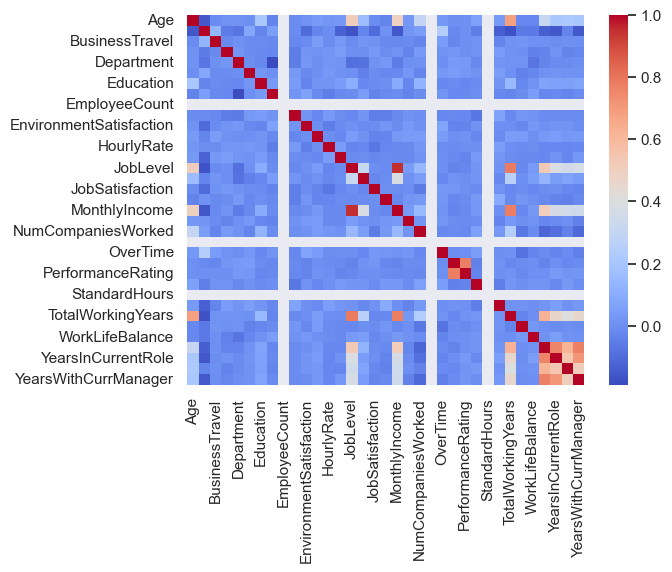

In [36]:
vCorrelationMatrix = vData.corr()
sn.heatmap(vCorrelationMatrix, annot=False, cmap="coolwarm")
plt.show()

In [38]:
# Se obtiene las correlaciones más fuertes en el DataSet.
vCorrelationMatrix[vCorrelationMatrix < 1][vCorrelationMatrix > 0.3].unstack() \
    .transpose().drop_duplicates().dropna().sort_values(ascending=False)

JobLevel                 MonthlyIncome              0.950300
                         TotalWorkingYears          0.782208
PercentSalaryHike        PerformanceRating          0.773550
MonthlyIncome            TotalWorkingYears          0.772893
YearsAtCompany           YearsWithCurrManager       0.769212
                         YearsInCurrentRole         0.758754
YearsInCurrentRole       YearsWithCurrManager       0.714365
Age                      TotalWorkingYears          0.680381
TotalWorkingYears        YearsAtCompany             0.628133
YearsAtCompany           YearsSinceLastPromotion    0.618409
YearsInCurrentRole       YearsSinceLastPromotion    0.548056
JobLevel                 YearsAtCompany             0.534739
MonthlyIncome            YearsAtCompany             0.514285
YearsSinceLastPromotion  YearsWithCurrManager       0.510224
Age                      JobLevel                   0.509604
                         MonthlyIncome              0.497855
TotalWorkingYears       

Al analizar el conjunto de datos disponible, se ha llevado a cabo un análisis de correlación de variables para determinar la existencia de una relación directa entre la variable objetivo "JobSatisfaction" y las demás variables presentes en el conjunto de datos. Tras el análisis, se ha observado que no existe evidencia empírica de una correlación significativa entre la variable "JobSatisfaction" y ninguna otra variable en el conjunto de datos.

Esta falta de correlación sugiere que no es posible utilizar los valores de las demás variables para predecir con precisión los niveles de satisfacción laboral de los empleados en esta muestra de datos. Por lo tanto, se recomienda un enfoque diferente para la evaluación y mejora de la satisfacción laboral en la población de estudio.

Es importante tener en cuenta que, aunque no se haya encontrado una correlación significativa en este conjunto de datos, puede haber otros factores que influyan en la satisfacción laboral y que no se han considerado en este análisis. Por lo tanto, se sugiere realizar un análisis más detallado de los datos y explorar posibles factores que puedan influir en la satisfacción laboral de los empleados en este contexto.

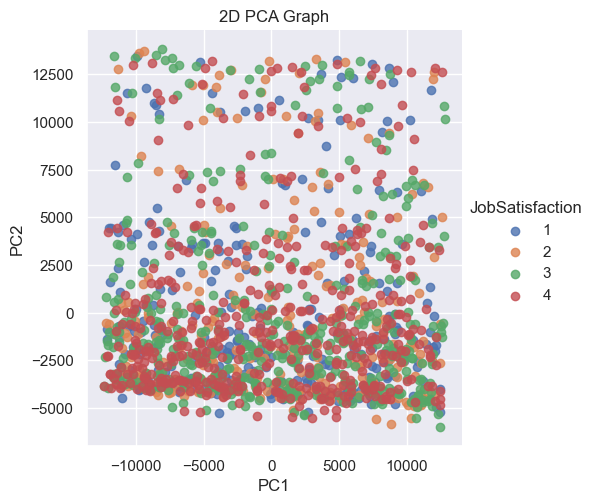

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca_features = pca.fit_transform(vData)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
pca_df["JobSatisfaction"] = vData["JobSatisfaction"]
pca_df.head()

sn.set()
 
sn.lmplot(
    x='PC1',
    y='PC2',
    data=pca_df, 
    hue='JobSatisfaction', 
    fit_reg=False, 
    legend=True
)
 
plt.title('2D PCA Graph')
plt.show()

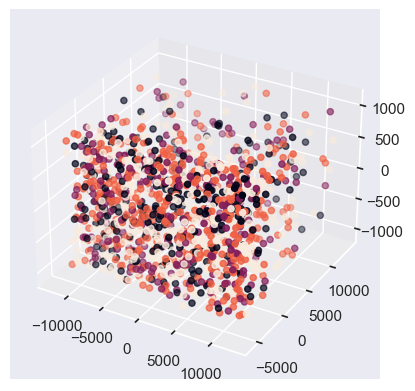

In [7]:
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c = pca_df["JobSatisfaction"])

En el proceso de análisis de datos, se realizó el método de Análisis de Componentes Principales (PCA) con el objetivo de reducir la complejidad del conjunto de datos y así poder aplicar técnicas de clustering. Durante este proceso, se examinó la variable "JobSatisfaction" en relación a las demás variables y se evidenció que no existía una correlación significativa con ninguna otra variable.

Este resultado puede indicar que no se puede desarrollar un modelo predictivo de machine learning para predecir los valores de la variable "JobSatisfaction" con la información disponible. Además, es posible que se requieran otras variables que no se encuentren en el conjunto de datos para lograr una mayor comprensión de la satisfacción laboral de los individuos en el estudio.

Es importante destacar que, aunque no se logró encontrar una correlación directa con otras variables, esto no necesariamente implica que la variable "JobSatisfaction" no sea importante en la comprensión del conjunto de datos. Por lo tanto, se recomienda realizar un análisis más profundo y considerar otras técnicas estadísticas para evaluar la importancia de esta variable en el conjunto de datos en cuestión.

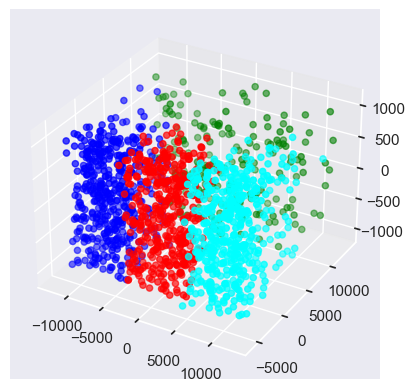

In [8]:
vClusterModel = KMeans(
    init = "random",
    n_init = "auto",
    n_clusters = 4
)

vClusterModel.fit(pca_df)
vClustersCenters = vClusterModel.cluster_centers_
vClustersLabels = vClusterModel.predict(pca_df)

vColors = ['red','green','blue','cyan','yellow']
vAssignedColors = []
for vRow in vClustersLabels:
    vAssignedColors.append(vColors[vRow])

plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c = vAssignedColors)

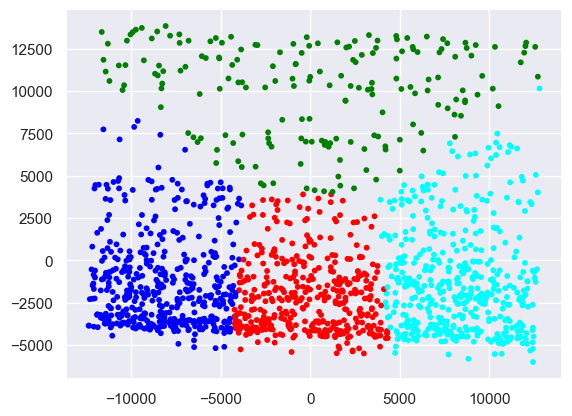

In [9]:
plt.scatter(pca_df["PC1"].values, pca_df["PC2"].values, c = vAssignedColors, s = 10)

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

xData = vData[[
    "Age", "Attrition", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField", "EmployeeCount",
    "EmployeeNumber", "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "MaritalStatus", "MonthlyIncome",
    "MonthlyRate", "NumCompaniesWorked", "Over18", "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
    "StandardHours", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]]
yData = vData[["JobSatisfaction"]]

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state=1)

In [11]:
def test_classifier(iClassifier):
    predictions_train = iClassifier.predict(xTrain)
    predictions_test = iClassifier.predict(xTest)

    print(f'Mean Absolute Error: {round(100*metrics.mean_absolute_error(yTest, predictions_test), 2)}%')
    print(f'Mean Squared Error: {round(100*metrics.mean_squared_error(yTest, predictions_test), 2)}%')
    print(f'Root Mean Squared Error: {round(100*np.sqrt(metrics.mean_squared_error(yTest, predictions_test)), 2)}%')

    test_size = len(yTest.values.ravel())
    print("\nTest size: ", test_size)

    train_score = accuracy_score(predictions_train, yTrain.values.ravel())
    print(f"score on train data: {round(100*train_score, 2)}%")

    test_score = accuracy_score(predictions_test, yTest.values.ravel())
    print(f"score on test data: {round(100*test_score, 2)}%")

    vConfussionMatrix = confusion_matrix(yTest.values.ravel(), predictions_test)

    plt.figure(figsize=(10,6))
    fx = sn.heatmap(vConfussionMatrix, annot=True, fmt=".2f",cmap="GnBu")
    fx.set_title('Confusion Matrix \n')
    fx.set_xlabel('\n Predicted Values\n')
    fx.set_ylabel('Actual Values\n')
    fx.xaxis.set_ticklabels(['Low','Mediun','High', 'Very High'])
    fx.yaxis.set_ticklabels(['Low','Mediun','High', 'Very High'])
    plt.show()

Mean Absolute Error: 114.4%
Mean Squared Error: 222.01%
Root Mean Squared Error: 149.0%

Test size:  368
score on train data: 97.46%
score on test data: 28.8%


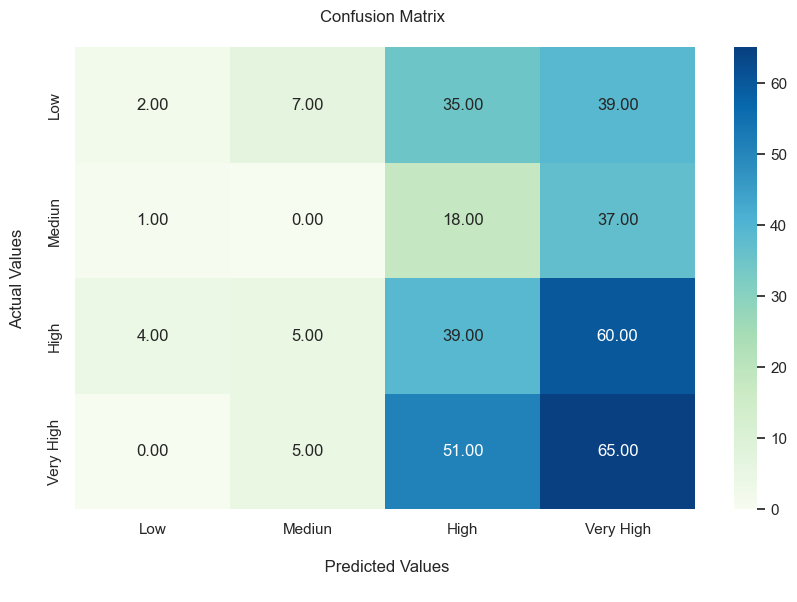

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=2)
clf_rf.fit(xTrain, yTrain.values.ravel())
test_classifier(clf_rf)

Mean Absolute Error: 112.77%
Mean Squared Error: 220.38%
Root Mean Squared Error: 148.45%

Test size:  368
score on train data: 34.66%
score on test data: 29.08%


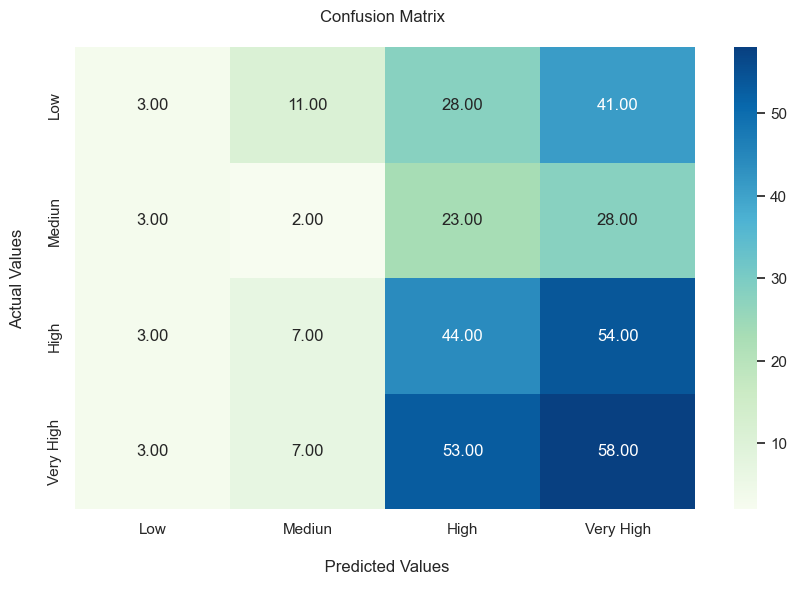

In [13]:
from sklearn.linear_model import LogisticRegression

clf_logistic = LogisticRegression(max_iter = 9000)
clf_logistic.fit(xTrain, yTrain.values.ravel())
test_classifier(clf_logistic)

c:\Users\Johan\Documents\Projects\Python\Prueba_Coink\env\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Mean Absolute Error: 109.51%
Mean Squared Error: 190.49%
Root Mean Squared Error: 138.02%

Test size:  368
score on train data: 26.77%
score on test data: 25.27%


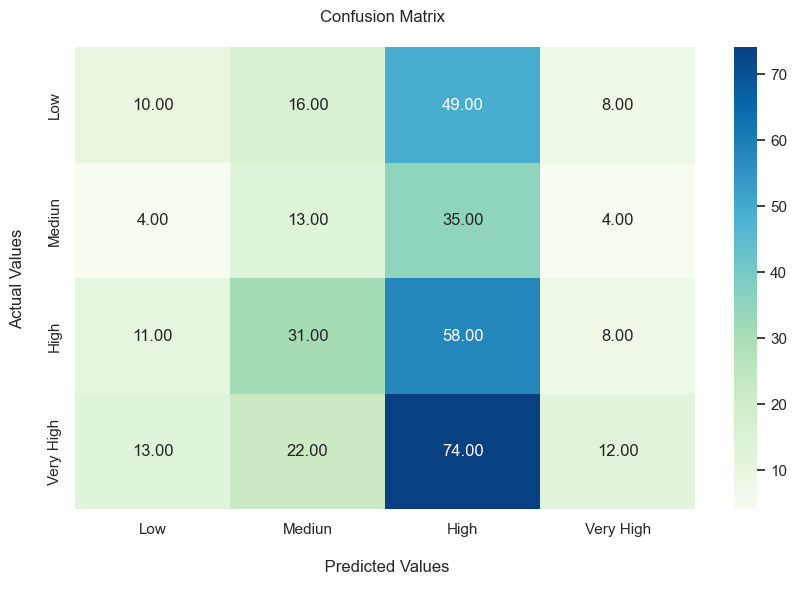

In [14]:
from sklearn.svm import SVC

#clf_svc = SVC(C = 100, kernel = 'linear', random_state=123, max_iter = 500)
clf_svc = SVC(C = 100, kernel = 'poly', random_state=123, max_iter = 500)
#clf_svc = SVC(C = 100, kernel = 'rbf', random_state=123, max_iter = 500)
#clf_svc = SVC(C = 100, kernel = 'sigmoid', random_state=123, max_iter = 500)
clf_svc.fit(xTrain, yTrain.values.ravel())
test_classifier(clf_svc)

c:\Users\Johan\Documents\Projects\Python\Prueba_Coink\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mean Absolute Error: 111.96%
Mean Squared Error: 225.0%
Root Mean Squared Error: 150.0%

Test size:  368
score on train data: 36.39%
score on test data: 31.79%


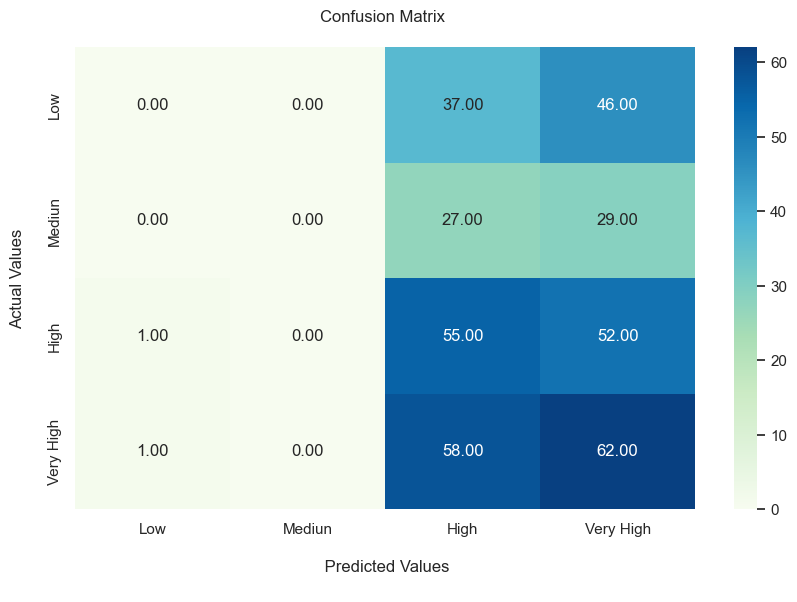

In [15]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(
    solver = 'lbfgs',
    alpha = 1e-5,
    hidden_layer_sizes = (9, 12, 15, 18, 21, 24, 30, 24, 21, 18, 15, 12, 9, 6, 3),
    #hidden_layer_sizes = (9, 12, 15, 30, 60, 30, 15, 5, 3),
    random_state = 2,
    max_iter = 500
)
clf_nn.fit(xTrain, yTrain.values.ravel())
test_classifier(clf_nn)

Durante el análisis exploratorio de datos, se identificó la variable "JobSatisfaction" como una característica potencialmente importante para la comprensión del comportamiento de los empleados en una organización. Se realizó un análisis detallado de esta variable utilizando algoritmos de aprendizaje automático como Random Forest, Logistic Regression, Support Vector Machines y Redes Neuronales. Sin embargo, a pesar de los esfuerzos realizados, los resultados obtenidos no fueron satisfactorios, con una precisión máxima del 32% en los datos de prueba. Este hallazgo sugiere que no existe una relación clara entre la variable JobSatisfaction y las demás características analizadas en este conjunto de datos. Por lo tanto, se concluye que los algoritmos de aprendizaje automático no son capaces de predecir de manera confiable la satisfacción laboral de los empleados utilizando las variables disponibles en el conjunto de datos. Esta información es importante para la toma de decisiones empresariales y futuras investigaciones sobre la relación entre la satisfacción laboral y otras variables relevantes en el entorno empresarial.

In [16]:
vSqlConnection = sqlite3.connect('resources/coink.db')
vData = pd.read_sql('SELECT * FROM TBT_JOB_SATISFACTION_BALANCED', vSqlConnection)
vData["Attrition"] = vData["Attrition"].apply(lambda x : 1 if "Yes" in x else 0)
vData["BusinessTravel"] = vData["BusinessTravel"].apply(lambda x : 0 if "Non-Travel" in x else (1 if "Travel_Rarely" in x else 2))
vData["Department"] = vData["Department"].apply(lambda x : 0 if "Human Resources" in x else (1 if "Sales" in x else 2))
vData["EducationField"] = vData["EducationField"].apply(lambda x : 0 if "Life Sciences" in x else (1 if "Medical" in x else (2 if "Marketing" in x else (3 if "Technical Degree" in x else (4 if "Human Resources" in x else 5)))))
vData["Gender"] = vData["Gender"].apply(lambda x : 1 if "Female" in x else 0)
vData["MaritalStatus"] = vData["MaritalStatus"].apply(lambda x : 1 if "Married" in x else (2 if "Single" in x else 3))
vData["Over18"] = vData["Over18"].apply(lambda x : 1 if "Y" in x else 0)
vData["OverTime"] = vData["OverTime"].apply(lambda x : 1 if "Yes" in x else 0)
vData["JobRole"] = vData["JobRole"].apply(lambda x : 1 if "Sales Executive" in x else ( 
    2 if "Research Scientist" in x else (
    3 if "Laboratory Technician" in x else (
    4 if "Manufacturing Director" in x else (
    5 if "Healthcare Representative" in x else (
    6 if "Manager" in x else (
    7 if "Sales Representative" in x else (
    8 if "Research Director" in x else 9
))))))))
vData.info()
vData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   NUM_REG                   494 non-null    int64
 1   Age                       494 non-null    int64
 2   Attrition                 494 non-null    int64
 3   BusinessTravel            494 non-null    int64
 4   DailyRate                 494 non-null    int64
 5   Department                494 non-null    int64
 6   DistanceFromHome          494 non-null    int64
 7   Education                 494 non-null    int64
 8   EducationField            494 non-null    int64
 9   EmployeeCount             494 non-null    int64
 10  EmployeeNumber            494 non-null    int64
 11  EnvironmentSatisfaction   494 non-null    int64
 12  Gender                    494 non-null    int64
 13  HourlyRate                494 non-null    int64
 14  JobInvolvement            494 non-null    

,NUM_REG,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,18,0,0,287,2,5,2,0,1,...,4,80,0,0,2,3,0,0,0,0
1,1,18,0,0,1124,2,1,3,0,1,...,3,80,0,0,5,4,0,0,0,0
2,1,18,0,0,1431,2,14,3,1,1,...,3,80,0,0,4,1,0,0,0,0
3,1,18,1,2,1306,1,5,3,2,1,...,4,80,0,0,3,3,0,0,0,0
4,1,18,1,1,230,2,3,3,0,1,...,3,80,0,0,2,3,0,0,0,0


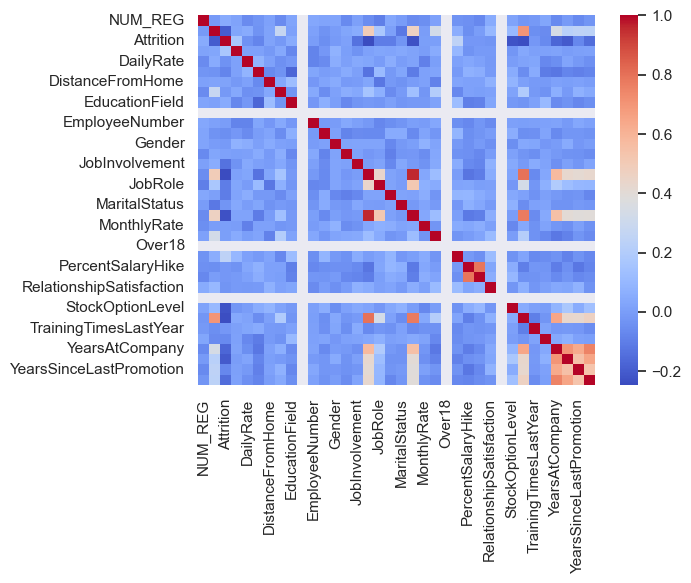

In [18]:
vCorrelationMatrix = vData.corr()
sn.heatmap(vCorrelationMatrix, annot=False, cmap="coolwarm")
plt.show()

In [19]:
xData = vData[[
    "Age", "Attrition", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField", "EmployeeCount",
    "EmployeeNumber", "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "MaritalStatus", "MonthlyIncome",
    "MonthlyRate", "NumCompaniesWorked", "Over18", "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction",
    "StandardHours", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]]
yData = vData[["JobSatisfaction"]]

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state=1)

Mean Absolute Error: 137.9%
Mean Squared Error: 278.23%
Root Mean Squared Error: 166.8%

Test size:  124
score on train data: 86.22%
score on test data: 16.94%


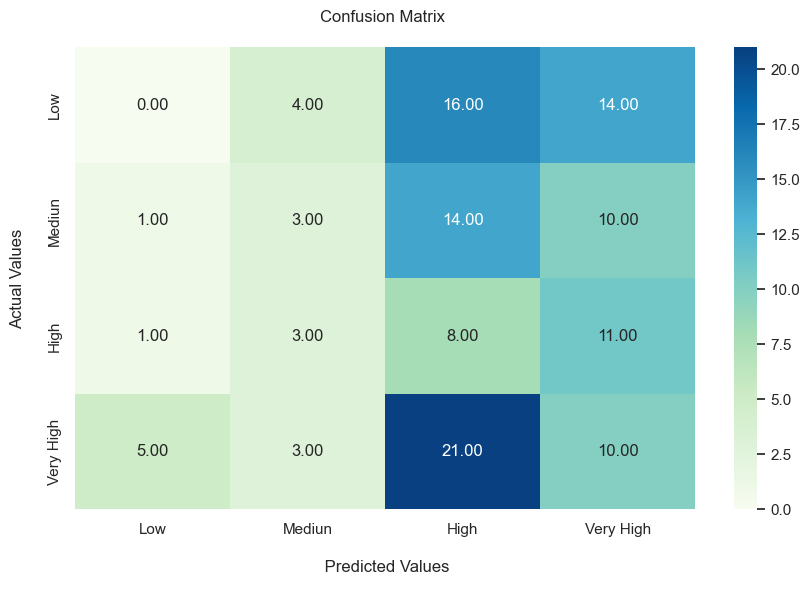

In [25]:
clf_rf = RandomForestClassifier(max_depth=5, random_state=2)
clf_rf.fit(xTrain, yTrain.values.ravel())
test_classifier(clf_rf)

Mean Absolute Error: 134.68%
Mean Squared Error: 273.39%
Root Mean Squared Error: 165.34%

Test size:  124
score on train data: 42.43%
score on test data: 19.35%


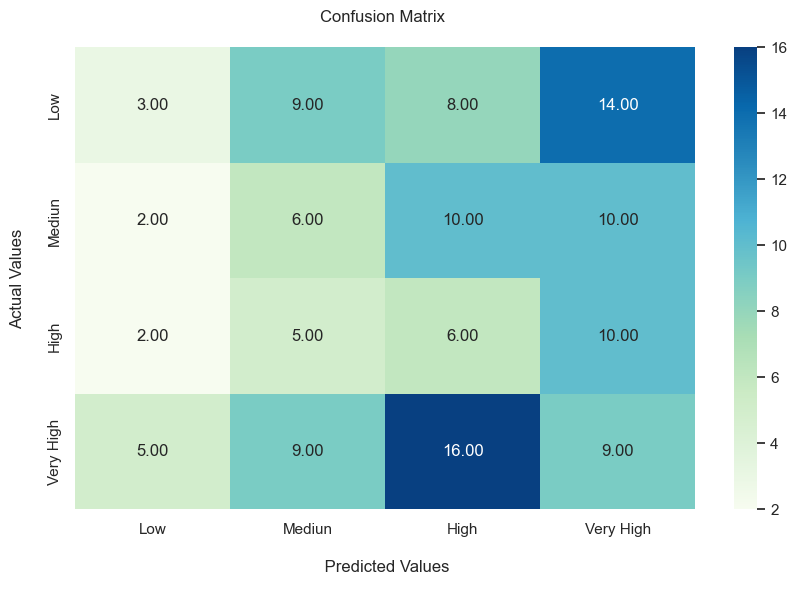

In [26]:
clf_logistic = LogisticRegression(max_iter = 9000)
clf_logistic.fit(xTrain, yTrain.values.ravel())
test_classifier(clf_logistic)

c:\Users\Johan\Documents\Projects\Python\Prueba_Coink\env\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Mean Absolute Error: 136.29%
Mean Squared Error: 268.55%
Root Mean Squared Error: 163.87%

Test size:  124
score on train data: 40.0%
score on test data: 17.74%


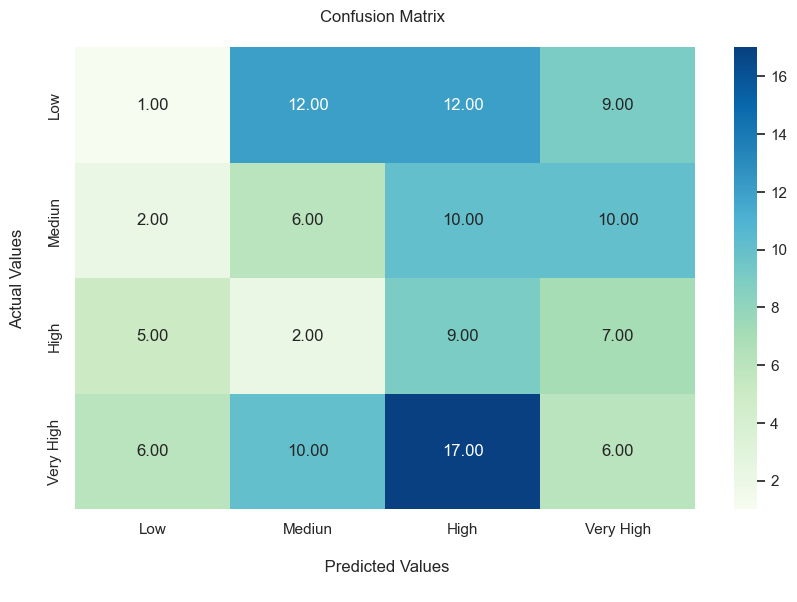

In [29]:
#clf_svc = SVC(C = 100, kernel = 'linear', random_state=123, max_iter = 500)
#clf_svc = SVC(C = 100, kernel = 'poly', random_state=123, max_iter = 500)
clf_svc = SVC(C = 100, kernel = 'rbf', random_state=123, max_iter = 500)
#clf_svc = SVC(C = 100, kernel = 'sigmoid', random_state=123, max_iter = 500)
clf_svc.fit(xTrain, yTrain.values.ravel())
test_classifier(clf_svc)

Mean Absolute Error: 125.0%
Mean Squared Error: 228.23%
Root Mean Squared Error: 151.07%

Test size:  124
score on train data: 37.3%
score on test data: 17.74%


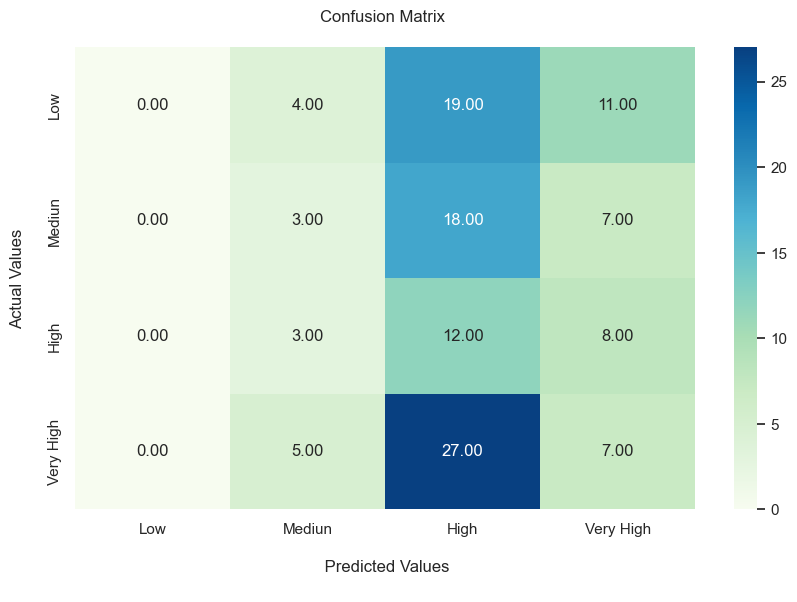

In [33]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(
    solver = 'lbfgs',
    alpha = 1e-5,
    hidden_layer_sizes = (4, 8, 12, 16, 20, 24, 28, 24, 20, 16, 12, 8, 4),
    random_state = 2,
    max_iter = 5000
)
clf_nn.fit(xTrain, yTrain.values.ravel())
test_classifier(clf_nn)

Se llevó a cabo una investigación exhaustiva de la variable "JobSatisfaction" mediante la aplicación de diversos algoritmos de Machine Learning, incluyendo Random Forest, Logistic Regression, Support Vector Machines y Redes Neuronales. Con el fin de evitar sesgos en los resultados, los datos se balancearon cuidadosamente para evitar la influencia de clases sobrerepresentadas o subrepresentadas.

A pesar de todos estos esfuerzos, no se encontró una correlación significativa entre la variable "JobSatisfaction" y ninguna otra variable en el conjunto de datos. Además, ningún algoritmo de Machine Learning logró obtener una precisión superior al 32% en los datos de prueba.

Estos hallazgos sugieren que la variable "JobSatisfaction" puede ser difícil de predecir utilizando solo los datos disponibles en el conjunto de datos. Se requerirían investigaciones adicionales y una exploración más profunda de otras variables potencialmente relacionadas para entender mejor este fenómeno.

In [45]:
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=10, population_size=100, cv=5,random_state=42, verbosity=2)

pipeline_optimizer.fit(xTrain, yTrain.values.ravel())
print(pipeline_optimizer.score(xTest, yTest.values.ravel()))
pipeline_optimizer.export('tpot_exported_pipeline.py')

                                                                                
Generation 1 - Current best internal CV score: 0.3162162162162162
                                                                                 
Generation 2 - Current best internal CV score: 0.31891891891891894
                                                                               
Generation 3 - Current best internal CV score: 0.31891891891891894
                                                                                 
Generation 4 - Current best internal CV score: 0.31891891891891894
                                                                                 
Generation 5 - Current best internal CV score: 0.327027027027027
                                                                               
Generation 6 - Current best internal CV score: 0.327027027027027
                                                                               
Generation 7 - Current best internal

c:\Users\Johan\Documents\Projects\Python\Prueba_Coink\env\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
c:\Users\Johan\Documents\Projects\Python\Prueba_Coink\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\Users\Johan\Documents\Projects\Python\Prueba_Coink\env\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


Se llevó a cabo un exhaustivo proceso de AutoML, que implicó la generación y evaluación de 10 generaciones de 1.000 algoritmos de Machine Learning distintos, en un intento por encontrar un modelo predictivo que permitiera alcanzar una precisión satisfactoria en la predicción de la variable JobSatisfaction. Sin embargo, a pesar de este proceso meticuloso, ningún modelo logró ofrecer un resultado concluyente, ya que ningún modelo de Machine Learning demostró tener una capacidad de predicción con una probabilidad de acierto superior al 32% en los datos de testing.

Esto nos lleva a inferir que la variable JobSatisfaction no presenta una correlación significativa con el resto de las variables del dataset, y que es posible que esta variable no pueda ser predicha con el conjunto actual de datos. Cabe destacar que se realizó una técnica de balanceo de datos para evitar agregar sesgos por abundancia o escasez en las clases, lo que permitió obtener una evaluación más precisa de los modelos de Machine Learning.

In [ ]:
from pandas_profiling import ProfileReport

vProfile = ProfileReport(vData, title = "Job Satisfaction - Report")
#vProfile.to_file("resources/job_satisfaction_auto_eda.html")